# This Notebook corresponds to the the thrid exercise at the first TP.

Exercise: Univariate and Bivariate analysis.

Objective: Exploring distribution and relationships.

Dataset: [Student Performance dataset](https://data.mendeley.com/datasets/5b82ytz489/1)

Dataset Description:


The Student Performance Metrics Dataset provides a diverse collection of academic and non-academic attributes aimed at evaluating factors influencing student performance in higher education. It enables researchers to analyse relationships between student demographics, academic achievements, socio-economic factors, and extracurricular activities.

<span style="color:green; font-weight:bold">Dataset Dictionary:</span> 
|Column|Description|
|:-|:-|
|Department|The academic department the student is enrolled in (e.g., Computer Science, Business, etc.)|
|Gender|The gender of the student|
|HSC|Score obtained in higher secondary education|
|SSC|Score obtained in secondary school education|
|Income|Monthly family income of their parents|
|Hometown|The type of area where the student resides (e.g., urban, rural)|
|Computer|Proficiency level in computer usage|
|Preparation|Time spent on study preparation outside class hours|
|Gaming|Time spent on gaming activities daily|
|Attendance|Regularity in class participation|
|Job|Indicates if the student has a part-time job|
|English| Proficiency in English communication skills|
|Extra| Participation in extracurricular activities|
|Semester| Current semester the student is enrolled in|
|Last|Performance in the last semester|
|Overall|Cumulative Grade Point Average (CGPA)|


##### Library importation:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading dataset:

In [2]:
dataset= "./../dataset/student_performance.csv"
data = pd.read_csv(dataset, sep=",")

##### Display columns:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   493 non-null    object 
 1   Gender       493 non-null    object 
 2   HSC          493 non-null    float64
 3   SSC          493 non-null    float64
 4   Income       493 non-null    object 
 5   Hometown     493 non-null    object 
 6   Computer     493 non-null    int64  
 7   Preparation  493 non-null    object 
 8   Gaming       493 non-null    object 
 9   Attendance   493 non-null    object 
 10  Job          493 non-null    object 
 11  English      493 non-null    int64  
 12  Extra        493 non-null    object 
 13  Semester     493 non-null    object 
 14  Last         493 non-null    float64
 15  Overall      493 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 61.8+ KB


##### Display head dataset:

In [4]:
data.head()

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall
0,Business Administration,Male,4.17,4.84,"Low (Below 15,000)",Village,3,More than 3 Hours,0-1 Hour,80%-100%,No,3,Yes,6th,3.220,3.350
1,Business Administration,Female,4.92,5.00,"Upper middle (30,000-50,000)",City,3,0-1 Hour,0-1 Hour,80%-100%,No,3,Yes,7th,3.467,3.467
2,Business Administration,Male,5.00,4.83,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,More than 3 Hours,80%-100%,No,4,Yes,3rd,4.000,3.720
3,Business Administration,Male,4.00,4.50,"High (Above 50,000)",City,5,More than 3 Hours,More than 3 Hours,80%-100%,No,5,Yes,4th,3.800,3.750
4,Business Administration,Female,2.19,3.17,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,2-3 Hours,80%-100%,No,3,Yes,4th,3.940,3.940


Fix encoding:

In [5]:
data["English"] = pd.Categorical(data["English"], categories=[1, 2, 3, 4, 5], ordered=True)
data["Computer"] = pd.Categorical(data["Computer"], categories=[1, 2, 3, 4, 5], ordered=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Department   493 non-null    object  
 1   Gender       493 non-null    object  
 2   HSC          493 non-null    float64 
 3   SSC          493 non-null    float64 
 4   Income       493 non-null    object  
 5   Hometown     493 non-null    object  
 6   Computer     493 non-null    category
 7   Preparation  493 non-null    object  
 8   Gaming       493 non-null    object  
 9   Attendance   493 non-null    object  
 10  Job          493 non-null    object  
 11  English      493 non-null    category
 12  Extra        493 non-null    object  
 13  Semester     493 non-null    object  
 14  Last         493 non-null    float64 
 15  Overall      493 non-null    float64 
dtypes: category(2), float64(4), object(10)
memory usage: 55.4+ KB


##### Plot histograms for all numerical features:

array([[<Axes: title={'center': 'HSC'}>, <Axes: title={'center': 'SSC'}>],
       [<Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Overall'}>]], dtype=object)

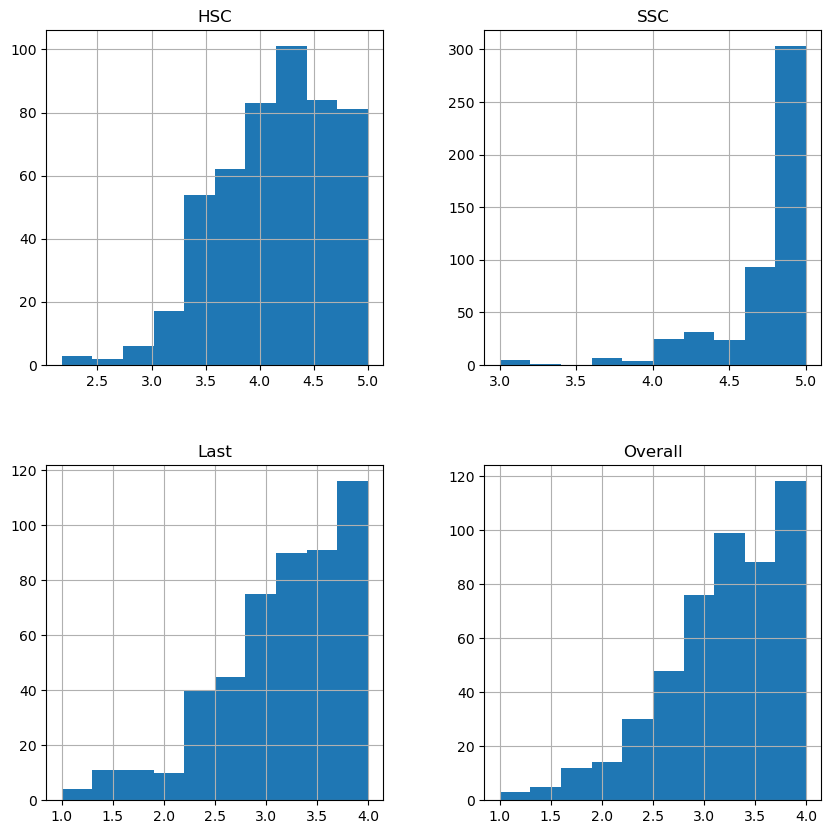

In [6]:
data.select_dtypes(include=["number"]).hist(figsize=(10, 10))

##### Create countplots for all categorical features:

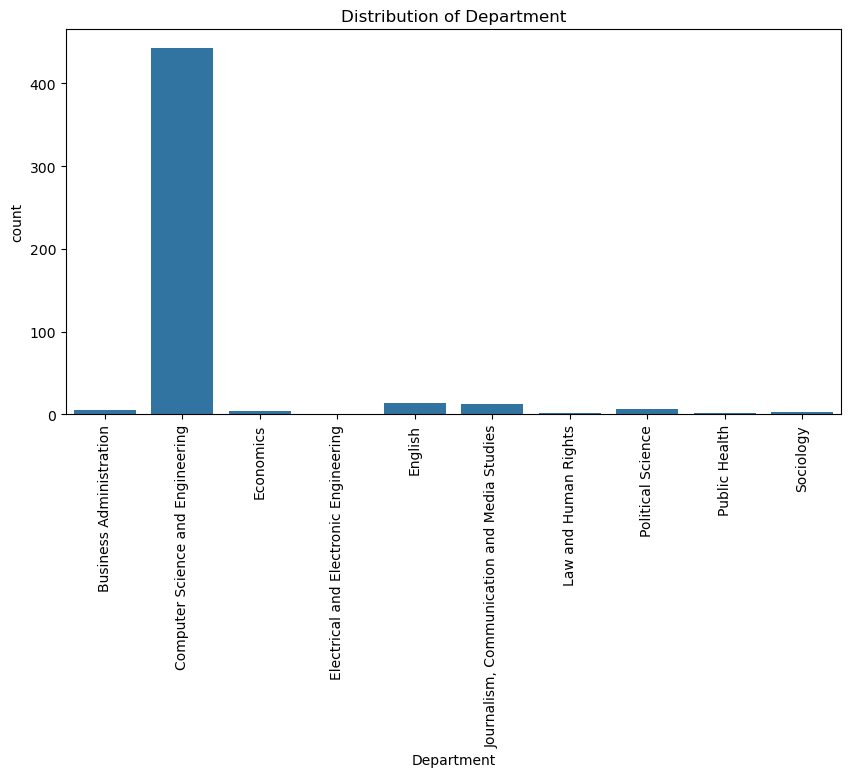

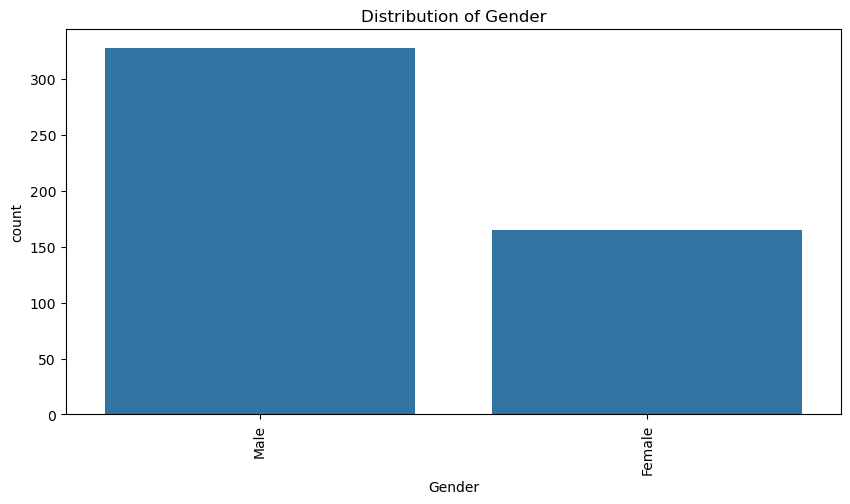

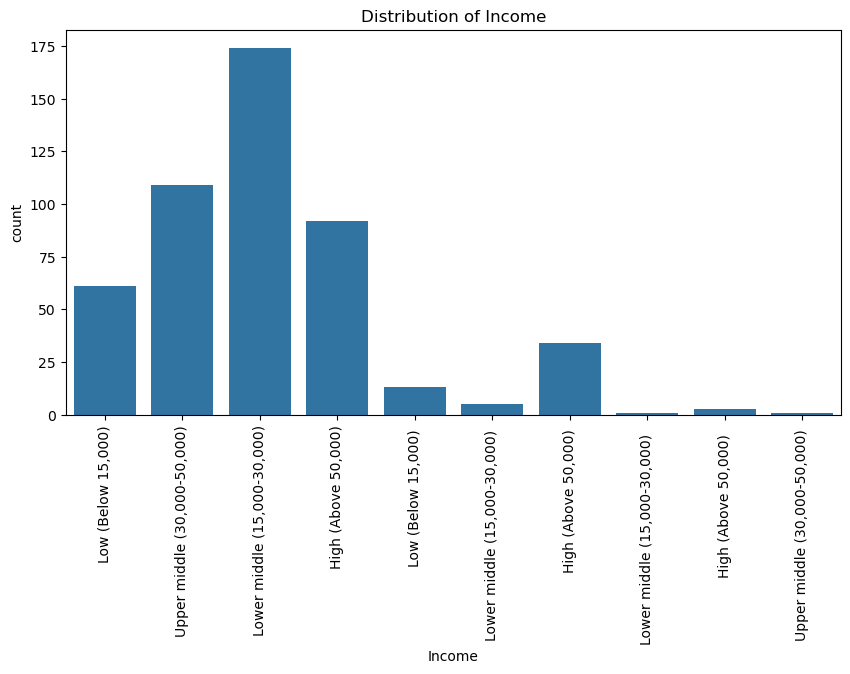

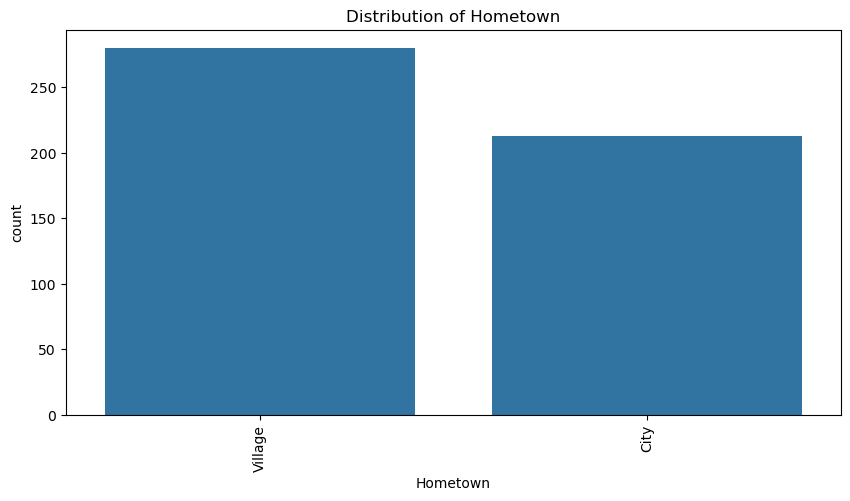

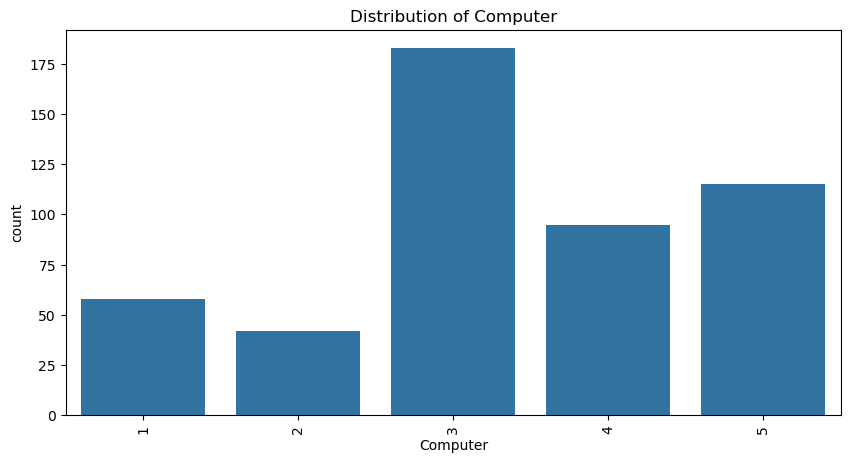

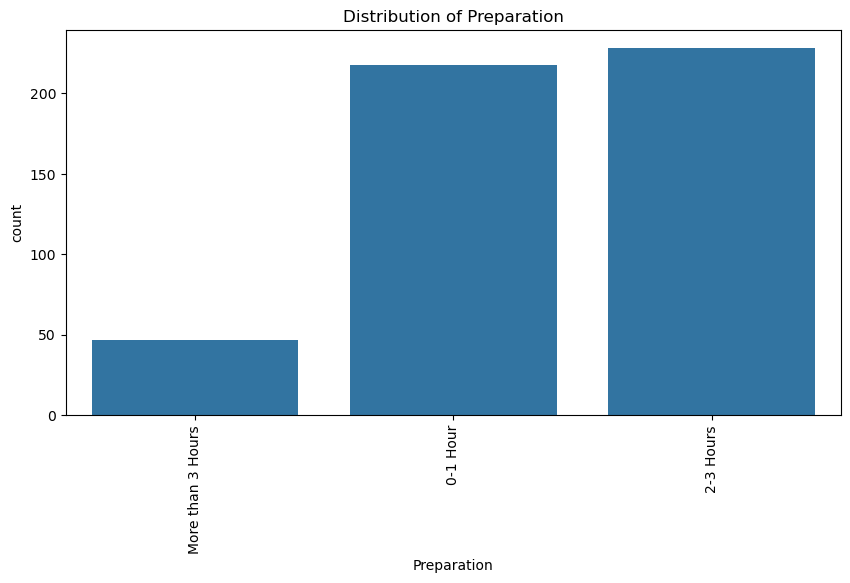

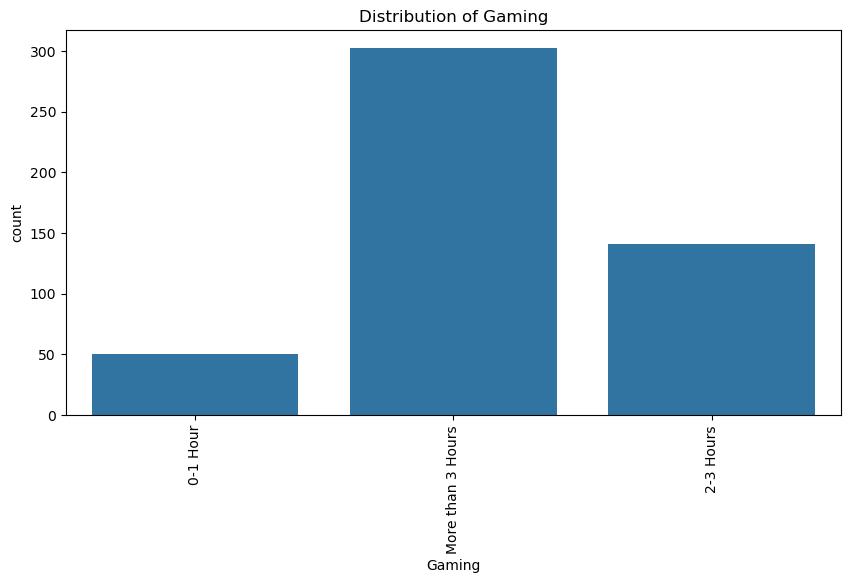

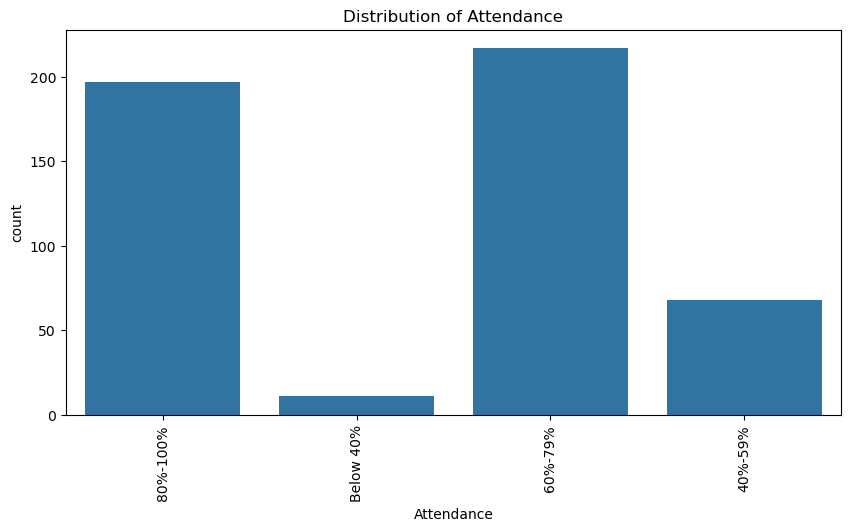

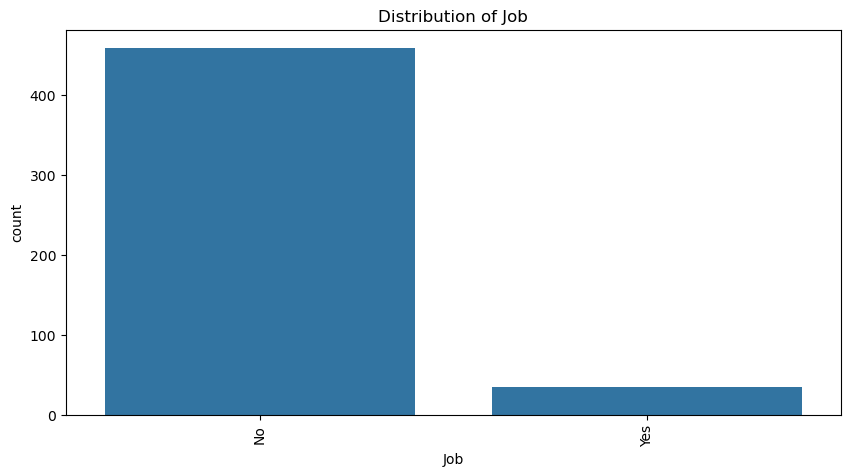

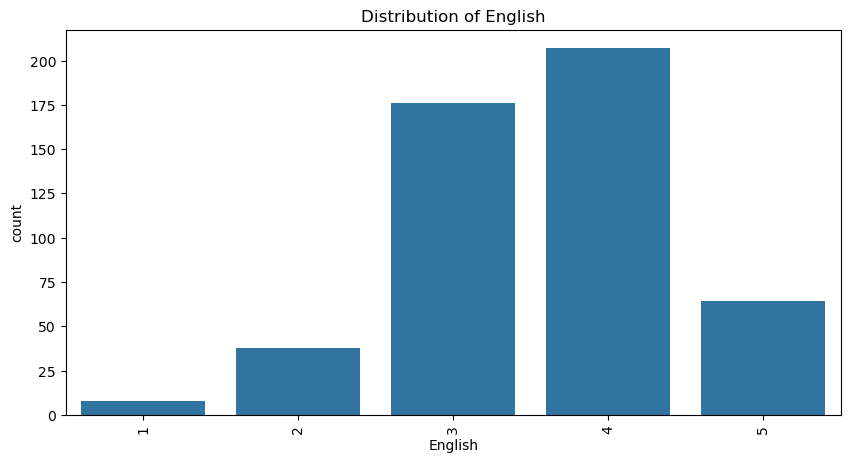

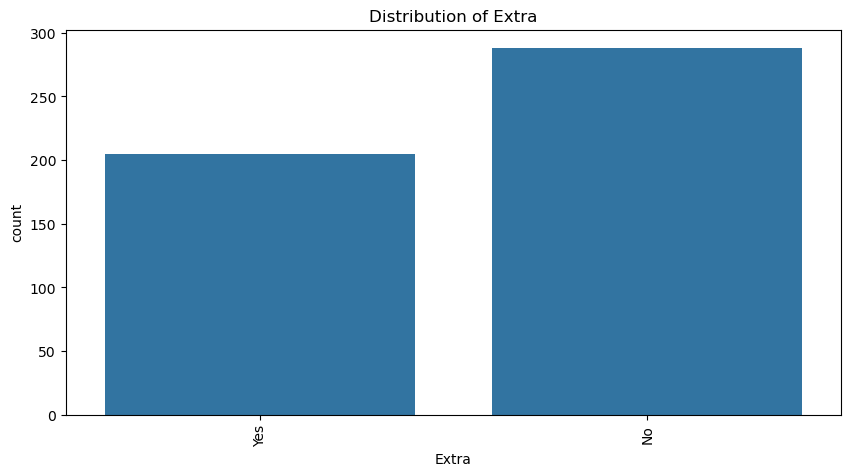

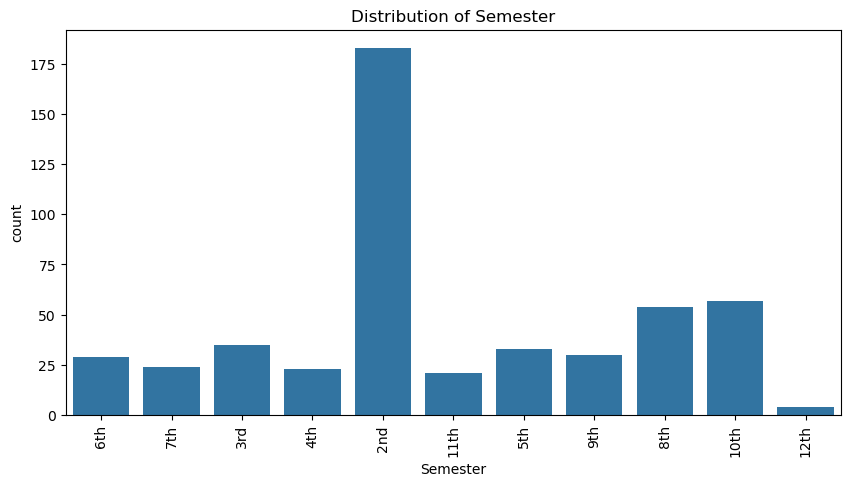

In [9]:
categorical_columns = data.select_dtypes(include=["object", "category"]).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

##### Identify skewness or unusual distributions in numeric data:

Skewness is a statistical measure of the asymmetry of a probability distribution

Types of skewness distribution:

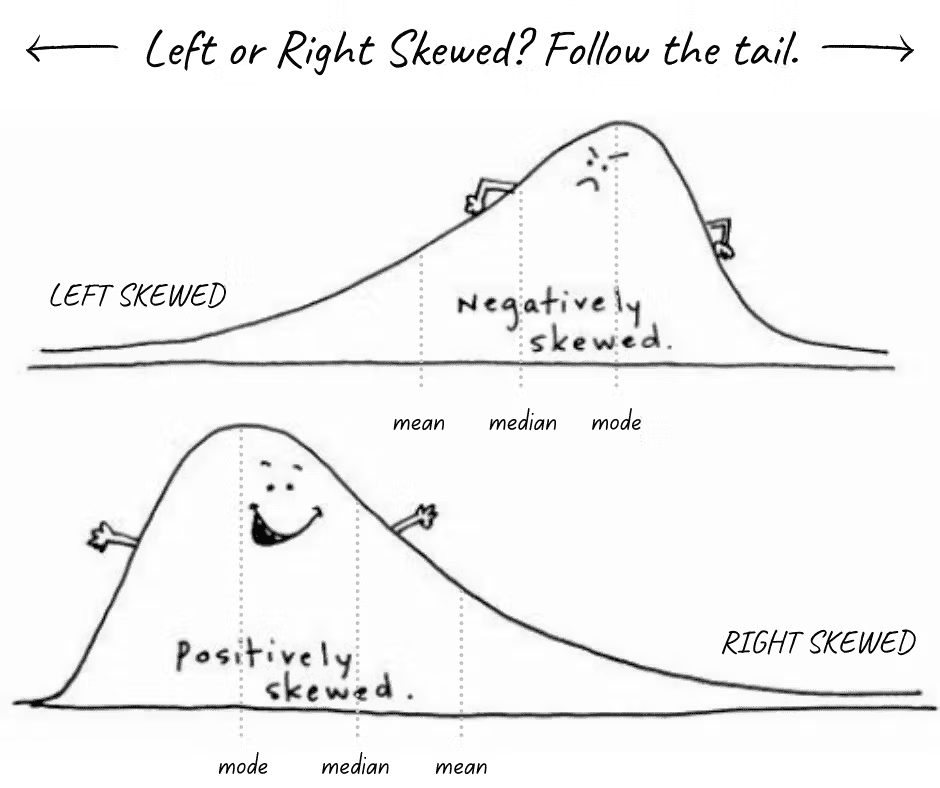

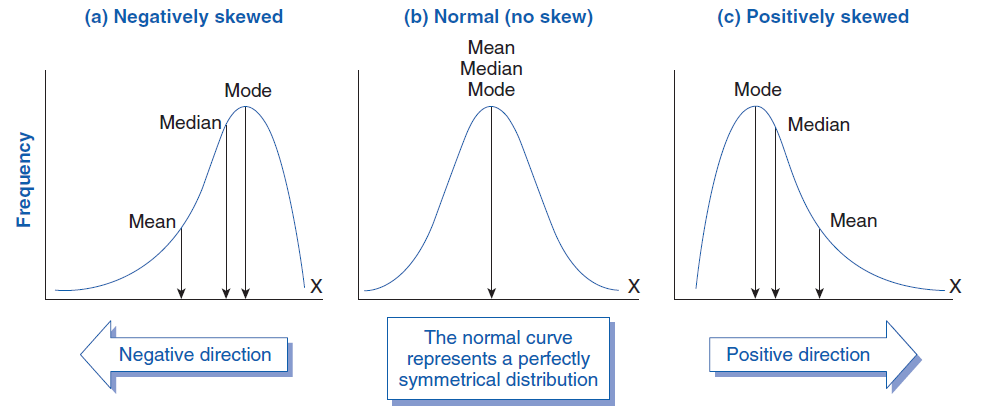

Tests of Skewness:
1) visually using: histogram, density plot, Quartial quartial plot (QQ plot).
2) Skewness Coefficient (Pearson's First Coefficient of Skewness): mean - mode.


How to handle skewed distribution:

1) Data transofrmation: 
    - Log Transformation: for right skewed distribution.
    - Square root/ cube root: for left skewed distribution.
    - Box-cox Transformation: A flexible method for handling both positive and negative skew.
2) Remove outliers:
    - z-score: z-score = (x-mean)/standard deviation. if z-socre out of the range [-3,3] most of time is considered as outlier.  
    - Inter Quartile Range  method: Q1-(1.5*(Q3-Q1)); Q3+(1.5*(Q3-Q1))


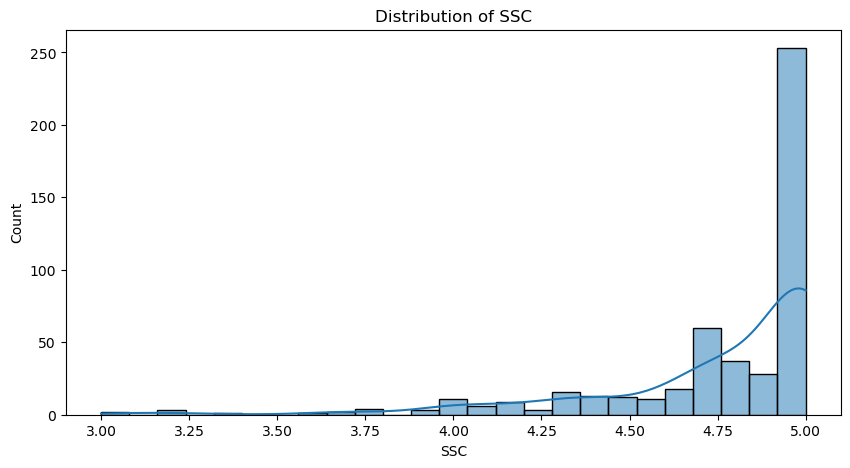

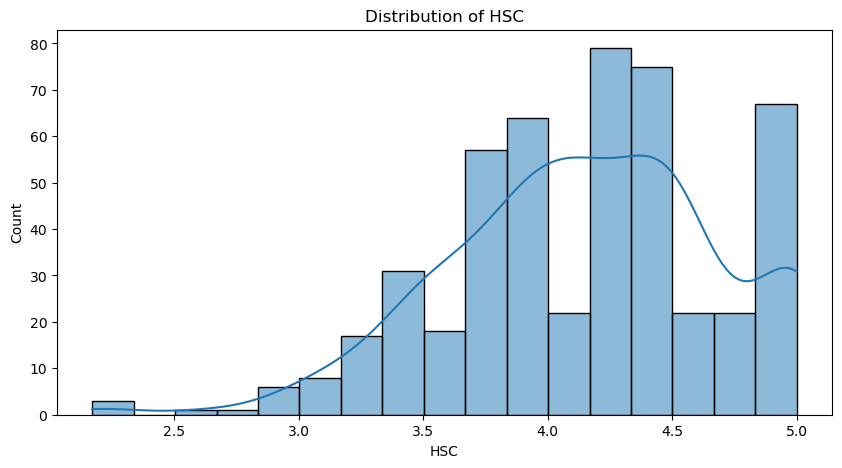

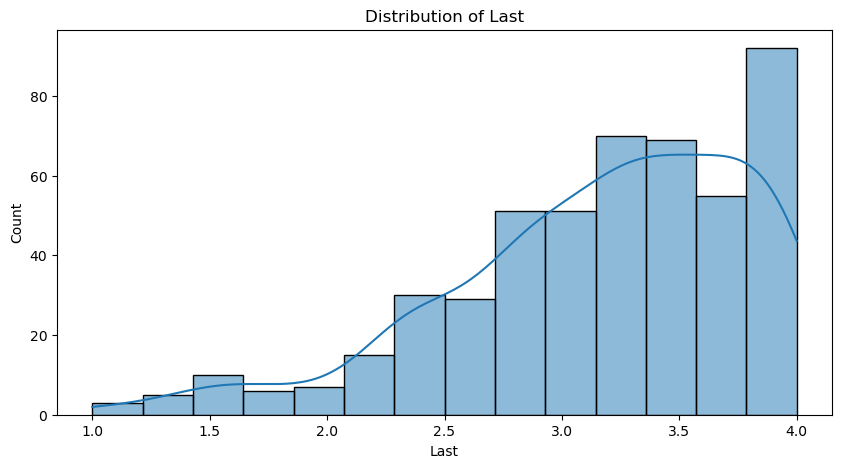

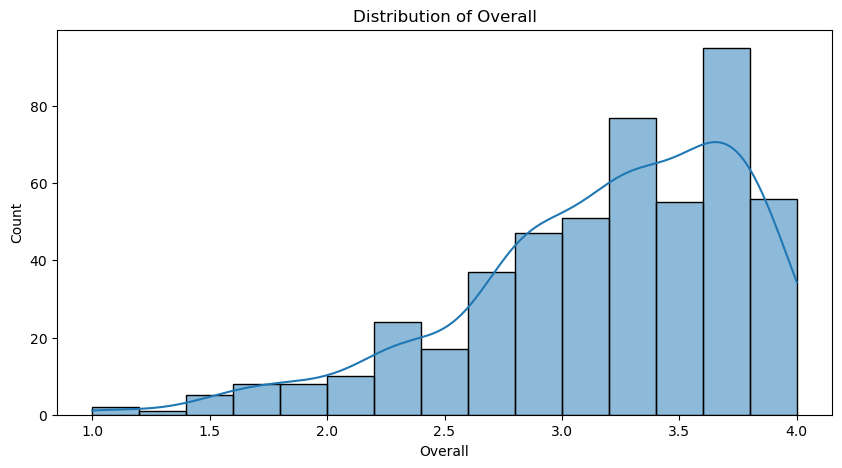

In [15]:
skewed_columns = ["SSC", "HSC", "Last", "Overall"]
for col in skewed_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

##### Use boxplots to compare numerical features across categories:

<Axes: xlabel='Gender', ylabel='Last'>

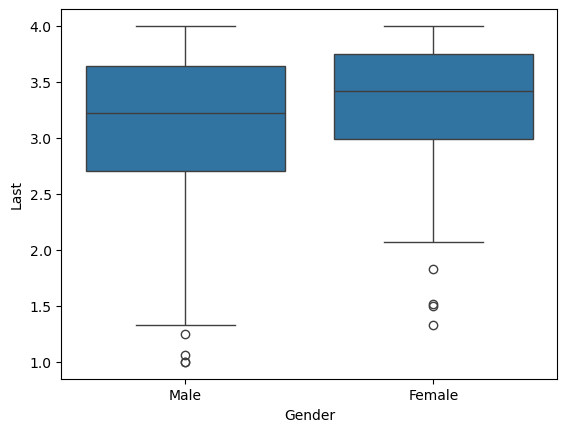

In [17]:
sns.boxplot(x="Gender", y="Last", data=data)

<Axes: xlabel='Gender', ylabel='Overall'>

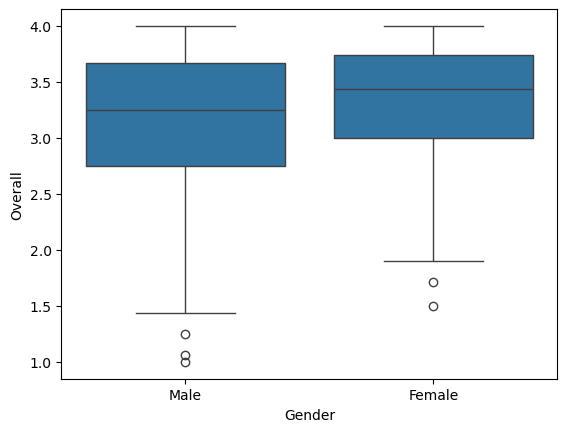

In [18]:
sns.boxplot(x="Gender", y="Overall", data=data)

<Axes: xlabel='English', ylabel='Overall'>

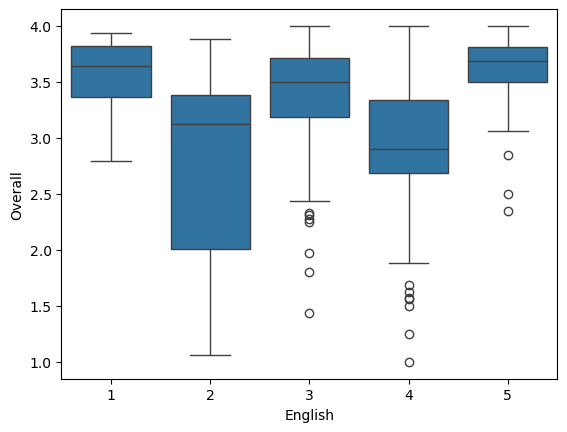

In [20]:
sns.boxplot(x="English", y="Overall", data=data)

<Axes: xlabel='English', ylabel='Last'>

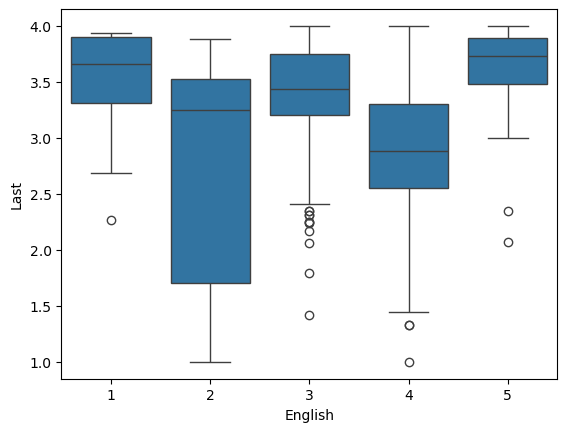

In [21]:
sns.boxplot(x="English", y="Last", data=data)

##### Create a correlation matrix and visualise it using a heatmap:

Method to calculate correlation: 
1) pearson correlation coefficient (r):
    - Measures: Linear relationship between two continuous variables.
    - Linearity: the coefficient only measures the strength of a linear relationship.
    - Outliers: Outliers can significantly affect the value of the Pearson correlation coefficient.
    - Distribution: The Pearson correlation coefficient is a parametric measure, assuming the data is normally distributed. 
2) Spearman Correlation (p):
    - Measures: Monotonic relationship between ordinal or continuous variables.
    - Data are not normally distributed or contain outliers.
3) Kendall tau coefficient (τ).
    - Measures:  the strength and direction of a monotonic relationship between two variable
    - used for: Small datasets or many tied ranks.
4) ETC.

Note: 
- Causation: Correlation does not imply causation. A strong correlation shows an association, but it does not mean one variable is causing the other.


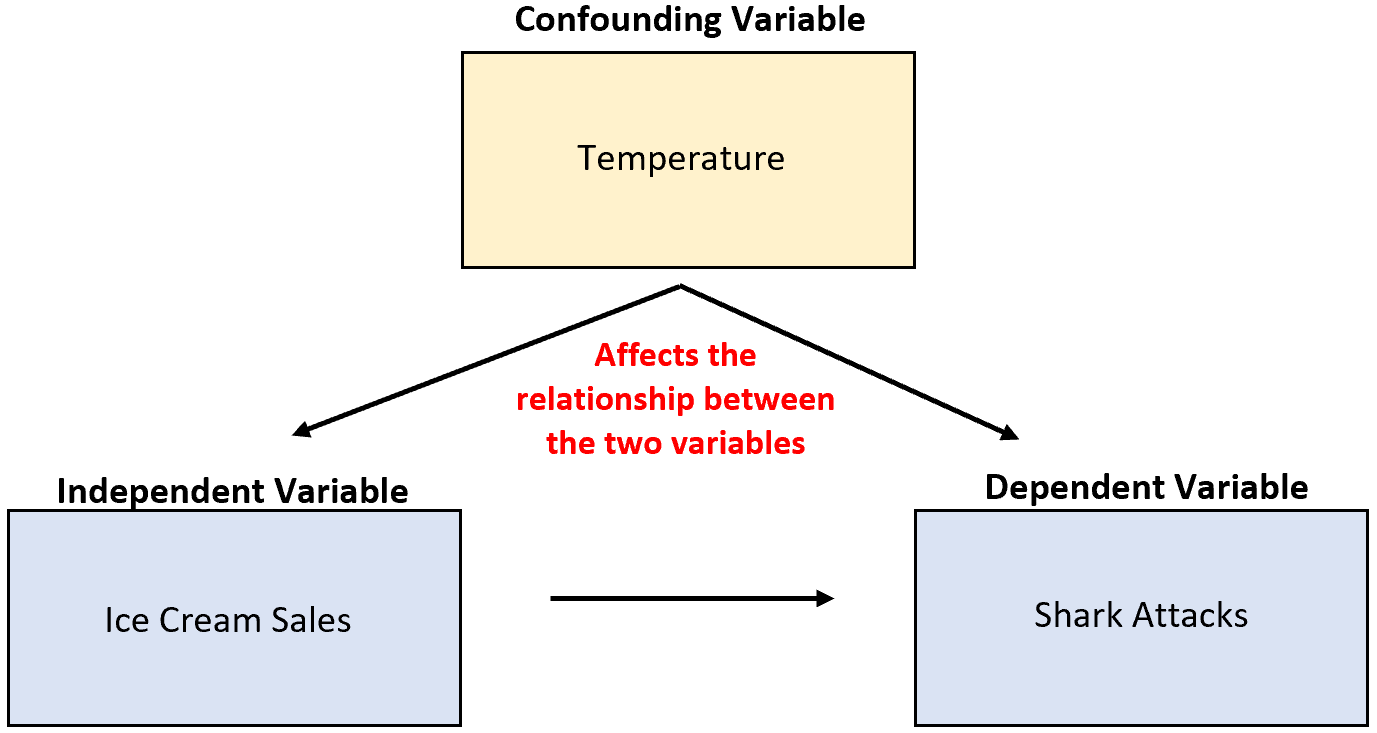

<Axes: >

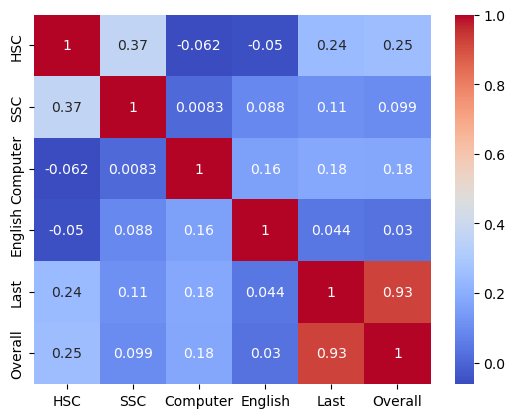

In [27]:
sns.heatmap(data.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm")

##### Plot scatterplots to explore relationships between two numerical variables:

array([[<Axes: xlabel='HSC', ylabel='HSC'>,
        <Axes: xlabel='SSC', ylabel='HSC'>,
        <Axes: xlabel='Computer', ylabel='HSC'>,
        <Axes: xlabel='English', ylabel='HSC'>,
        <Axes: xlabel='Last', ylabel='HSC'>,
        <Axes: xlabel='Overall', ylabel='HSC'>],
       [<Axes: xlabel='HSC', ylabel='SSC'>,
        <Axes: xlabel='SSC', ylabel='SSC'>,
        <Axes: xlabel='Computer', ylabel='SSC'>,
        <Axes: xlabel='English', ylabel='SSC'>,
        <Axes: xlabel='Last', ylabel='SSC'>,
        <Axes: xlabel='Overall', ylabel='SSC'>],
       [<Axes: xlabel='HSC', ylabel='Computer'>,
        <Axes: xlabel='SSC', ylabel='Computer'>,
        <Axes: xlabel='Computer', ylabel='Computer'>,
        <Axes: xlabel='English', ylabel='Computer'>,
        <Axes: xlabel='Last', ylabel='Computer'>,
        <Axes: xlabel='Overall', ylabel='Computer'>],
       [<Axes: xlabel='HSC', ylabel='English'>,
        <Axes: xlabel='SSC', ylabel='English'>,
        <Axes: xlabel='Computer', yla

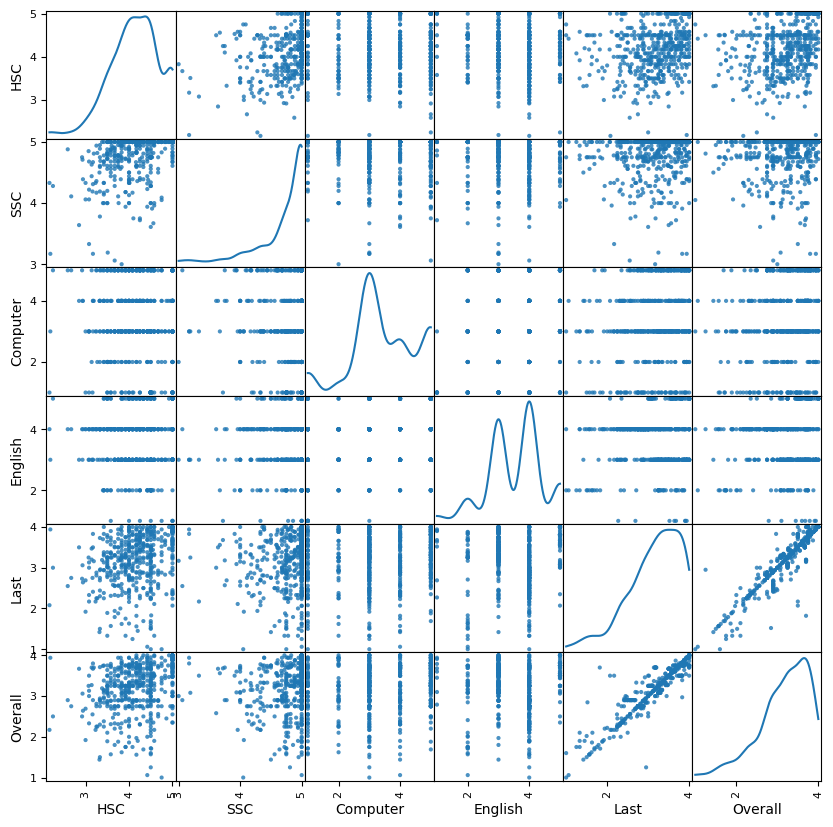

In [29]:
pd.plotting.scatter_matrix(data, alpha=0.8, figsize=(10, 10), diagonal='kde')


##### Write 3 short observations based on the plots (e.g., “Students with higher reading scores tend to have higher writing scores”):

Reference:
- https://www.datacamp.com/tutorial/covariance
- https://www.geeksforgeeks.org/maths/measures-of-dispersion/
- https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis
- https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/z-scores/a/z-scores-review
- https://www.geeksforgeeks.org/data-science/skewness-measures-and-interpretation/
- https://www.geeksforgeeks.org/maths/difference-between-histogram-and-density-plot/